In [37]:
import numpy as np
import CellModeller
from CellModeller.Simulator import Simulator 

In [38]:
model = '/Users/timrudge/cellmodeller/Examples/ex1_simpleGrowth.py'
sim = Simulator(model, 0.025, clPlatformNum=0, clDeviceNum=0, saveOutput=True)

Set up OpenCL context:
  Platform: Apple
  Device: Intel(R) Core(TM) i7-3820QM CPU @ 2.70GHz
Importing model ex1_simpleGrowth
Running in batch mode: no display will be output


In [39]:
# Run the simulation to ~500 cells
while len(sim.cellStates)<500:
    sim.step()

      10           6 cells           3 contacts
   10     6 cells       3 cts       1 iterations  residual = 0.000001
      20           6 cells           3 contacts
   20     6 cells       3 cts       1 iterations  residual = 0.000001
      30           6 cells           3 contacts
   30     6 cells       3 cts       1 iterations  residual = 0.000001
      40           6 cells           3 contacts
   40     6 cells       3 cts       1 iterations  residual = 0.000015
      50          11 cells           8 contacts
   50    12 cells       9 cts       2 iterations  residual = 0.000023
      60          12 cells          10 contacts
   60    12 cells      10 cts       1 iterations  residual = 0.000139
      70          12 cells          10 contacts
   70    12 cells      10 cts       1 iterations  residual = 0.000053
      80          12 cells          10 contacts
   80    12 cells      10 cts       1 iterations  residual = 0.000101
      90          24 cells          25 contacts
   90   

In [40]:
print sim.phys.n_cells
print sim.stepNum

# We can get the data directly from the running simulation
cs = sim.cellStates

# or from a saved pickle file
import cPickle
data = cPickle.load(open('/Users/timrudge/cellmodeller/data/ex1_simpleGrowth-17-11-17-14-00/step-00600.pickle','rb'))
cs = data['cellStates']
# And we can restart the saved simulation:
sim.loadFromPickle(data)

# Make some convenient data arrays from cell properties
lengths = np.array([cell.length for (id,cell) in cs.iteritems()])
pos = np.array([cell.pos for (id,cell) in cs.iteritems()])
norm = np.array([cell.dir for (id,cell) in cs.iteritems()])

500
316


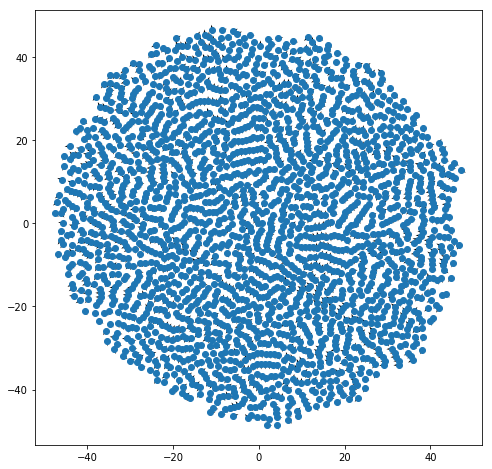

In [41]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# Plot the position and orientation of each cell
plt.figure(figsize=(8,8))
plt.plot(pos[:,0], pos[:,1], 'o')
plt.quiver(pos[:,0], pos[:,1], norm[:,0], norm[:,1])

(array([  32.,   89.,  137.,  209.,  249.,  312.,  339.,  381.,  402.,  182.]),
 array([  0.23257172,   5.17148305,  10.11039438,  15.04930571,
         19.98821704,  24.92712837,  29.86603971,  34.80495104,
         39.74386237,  44.6827737 ,  49.62168503]),
 <a list of 10 Patch objects>)

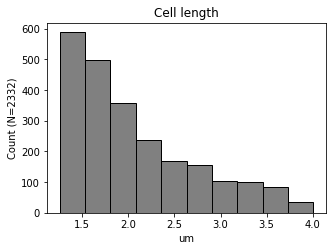

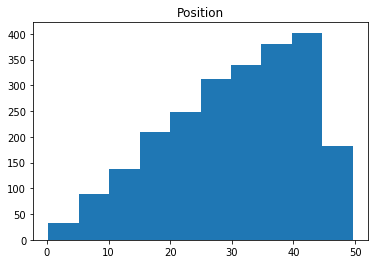

In [42]:
# Plot histograms of some cell properties

# Length
plt.figure(figsize=(5,3.5))
plt.title('Cell length')
plt.hist(lengths, edgecolor='black', color='gray')
plt.xlabel('um')
plt.ylabel('Count (N=%d)'%(len(cs)))
plt.savefig('lengthhist.pdf', density=600)

# Distance from origin
plt.figure()
plt.title('Position')
plt.hist(np.sqrt(pos[:,0]**2+pos[:,1]**2))

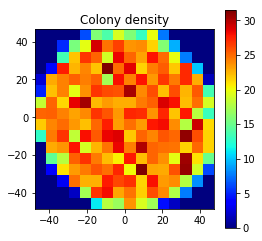

In [43]:
# Compute the cell density in regular bins as a weighted 2d histogram

fig = plt.figure(figsize=(4,4))
plt.title('Colony density')
H, xedges, yedges = np.histogram2d(pos[:,0], pos[:,1], weights=lengths, bins=16)
plt.imshow(H, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='jet')
plt.colorbar()
plt.savefig('density.pdf', dpi=600)

In [46]:
# We can also examine the details of the running simulation,
# e.g. the residual overlaps between cells (error)

# Get the physics solver
phys = sim.phys
# Update the contact information
phys.find_contacts()
# Overlap per cell
d = 0.5*phys.ct_dists_dev[0:phys.n_cells,:].get()

# Min and max of overlap
print np.min(d.ravel()), np.max(d.ravel())

-0.0871351 0.0297918


In [27]:
(id, cell) = cs.items()[0]
cell.

In [29]:
lineage = data['lineage']

In [47]:
phys.updateCellNeighbours(sim.idxToId)

In [48]:
# Count the number of neighbours that are sisters
count = 0
phys.computeNeighbours = True
for (id,cell) in cs.iteritems():
    sim.phys.updateCellState(cell)
    for i in cell.neighbours:
        nbr = cs[i]
        if lineage[id]==lineage[i]:
            count += 1

[2038, 1084, 1904, 2868, 2164, 2012, 1386]
[1356, 3490, 1368, 3086, 3574]
[1116, 1864, 2638]
[3930, 973, 2444, 4040, 1800, 3514]
[3682, 2468, 876, 4052, 3890]
[1086, 885, 4266]
[1930, 2988, 2872, 4436, 2484, 3064, 2234]
[2490, 3962, 3052, 3242]
[2468, 2870, 837, 3890, 2724, 2942]
[3408, 1086, 1856, 839]
[3450, 1186, 2870, 3890]
[2982, 2300, 1828, 3868, 3888]
[1150, 1746, 3774, 4456, 3814]
[1942, 3484, 3680, 1424, 2282]
[2358, 3380, 3776, 3160, 4380, 2788]
[1176, 4050, 2922]
[2198, 3482, 4498, 1656, 2674]
[1176, 1150, 1644, 1450, 3814, 3306]
[1336, 2014, 2664, 4204]
[2490, 4248, 1972]
[2530, 2088, 1118, 4054, 1698]
[1258, 3266, 2878, 2222, 2470]
[2760, 2370, 1392, 3334, 3726, 3536, 1354]
[4392, 1066, 3980, 2682, 3410]
[1896, 3212, 2514, 4334, 1768]
[1160, 836, 4040, 2444, 2816]
[3746, 3290, 2282, 1424, 3862]
[1728, 2190, 1928, 3598, 4612, 1394]
[]
[4230, 3432, 2380, 2762, 3544, 1534]
[]
[955, 3410, 1990, 3786, 1832, 3472]
[]
[784, 2664, 2014, 2038, 2868]
[3408, 1190, 885, 3244, 839, 426

[]
[]
[4420, 2528, 4154, 4662, 3372, 1994]
[]
[]
[]
[1212, 2340, 1892, 2916, 3508]
[]
[]
[]
[1896, 1618, 3212, 3506, 2872, 3448]
[]
[1190, 1086, 839]
[]
[2610, 1410, 1312, 1542, 2220, 3160]
[]
[]
[]
[3498, 1786, 3128, 2662, 2348, 2018]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2264, 1556, 4552, 2116, 3430, 3630]
[]
[2372, 1316]
[]
[]
[]
[]
[]
[]
[]
[3486, 4000, 3240, 2150, 4192, 2636]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1212, 3792, 1252, 4124, 2502, 2460, 4566]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1420, 2068, 3212, 960, 3262, 1768]
[]
[]
[]
[]
[]
[3820, 1986, 3138, 1968, 2922]
[]
[1260, 1116, 1432, 3804]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1828, 1190, 2422]
[]
[]
[]
[1394, 1606, 1818, 2724, 2778, 2942, 3932]
[]
[]
[]
[1318, 3380, 1494, 926, 2788]
[]
[]
[]
[]
[]
[]
[]
[3338, 1928, 4630, 1702, 3790, 3628, 2908]
[]
[]
[]
[1838, 3246, 955, 2682, 3898, 1782]
[]
[]
[]
[2142, 1856, 3104, 2286]
[]
[]
[]
[]
[